# TP: Machine Learning

## TP1: Linear Regression (4h)  

Linear regression is a family of machine learning algorithms aiming at adjusting a linear model to an ensemble of data. The applications range from signal reconstruction to empirical description.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP1 is to manipulate this dataset and try to predict the evolution of Life Expectancy through different variables.

**Objectives:**
- Use and setup an iPython environment
- Manipulate and visualize data
- Implement a simple linear regression
- Apply the aforementioned linear regression
- Compute a $R^2$ on the generated results
- Apply Ridge and Lasso regressions


To code this TP, you can use your own iPython environment, or chose to use the ENSEA's jupyter server available on https://io.ensea.fr

This TP has different **checkpoints**. Please call your teacher at the end of each checkpoint to validate your work. Any non validated work won't be taken into account in the notation


## STEP 1: Use and setup an iPython environment

iPython and Notebook environments are useful tools to quickly prototype and test machine learning solutions. However, they have limitations especially in RAM and disk access.

**TO DO 1.1**

Execute the following cells

In [ ]:
a = 3
b = 4
c = a + b

In [ ]:
c = c

In [ ]:
print(c)

7


In [ ]:
c

7

**QUESTION 1**

What is triggering the output display?

**TO DO 1.2**

Execute the following cells

In [ ]:
import shutil
import pkgutil

def show_acceptable_modules():
    line = '-' * 100
    print('{}\n{:^30}|{:^20}\n{}'.format(line, 'Module', 'Location', line))
    for entry in pkgutil.iter_modules():
        print('{:30}| {}'.format(entry[1], entry[0].path))

In [ ]:
show_acceptable_modules()

----------------------------------------------------------------------------------------------------
            Module            |      Location      
----------------------------------------------------------------------------------------------------
__future__                    | /usr/lib/python3.11
__hello__                     | /usr/lib/python3.11
__phello__                    | /usr/lib/python3.11
_aix_support                  | /usr/lib/python3.11
_bootsubprocess               | /usr/lib/python3.11
_collections_abc              | /usr/lib/python3.11
_compat_pickle                | /usr/lib/python3.11
_compression                  | /usr/lib/python3.11
_markupbase                   | /usr/lib/python3.11
_osx_support                  | /usr/lib/python3.11
_py_abc                       | /usr/lib/python3.11
_pydecimal                    | /usr/lib/python3.11
_pyio                         | /usr/lib/python3.11
_sitebuiltins                 | /usr/lib/python3.11
_strptime         

**QUESTION 2**

What is displayed on the last output?

Which is the used Python version?

For this TP1, you will need:
- pandas
- matplotlib
- numpy
- sklearn

Are these packages installed in this environment?

**TO DO 1.3**

Execute the following cell

In [ ]:
import pandas as pd
pd.__version__


'2.2.2'

**QUESTION 3**

How would you solve this error?

## STEP 2: Data manipulation and visualization


**TO DO 2.1**

Execute the following cell

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
files.upload()


df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df.info()
df.head()
df.describe()

Saving Life_Expectancy_Data.csv to Life_Expectancy_Data.csv
<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_mortality                  1649 non-null   float64
 5   Infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five_deaths          

,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness _1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


**QUESTION 4**

Can you explain the different elements printed on the last output?


--> The df.info() output shows the structure of the DataFrame: it lists all columns with their name, data type, and number of non-null (non-missing) values. It also summarizes how many columns are of each type (float64, int64, object) and the approximate memory used. This helps verify data quality and check for missing values.



In [ ]:
df1 = df[(df.Country == "France") & (df.Year > 2010)]
print("df1: ", df1)
df2 = df[(df.Country == "France")].Year
print("df2: ", df2)

df1:      Country  Year      Status  Life_expectancy  Adult_mortality  \
931  France  2014  Developing             82.2             79.0   
932  France  2013  Developing             82.0             81.0   
933  France  2012  Developing             81.5             83.0   
934  France  2011  Developing             81.7             83.0   

     Infant_deaths  Alcohol  Percentage_expenditure  Hepatitis_B  Measles  \
931              3     11.5             6739.677606         83.0      267   
932              3     11.1             6646.953935         74.0      272   
933              3     11.5              751.379355         78.0        0   
934              3     11.8              683.919057         74.0    14949   

     ...  Polio  Total_expenditure  Diphtheria  HIV_AIDS          GDP  \
931  ...   98.0              11.54        98.0       0.1  42955.24287   
932  ...   99.0              11.56        99.0       0.1  42554.12250   
933  ...   99.0              11.44        99.0       

**QUESTION 5**

How do you interpret the new Data Frame df1 compared to df? What represents df2 compared to df1?

-->df1 is a filtered DataFrame that contains all columns, but only the rows where the country is "France" and the year is after 2010.
df2 is a Series that contains only the Year column for the country "France", regardless of the year.
In short, df1 is a narrowed view of full data for recent years, while df2 is a focused extraction of the year values for France.

**TO CODE 2.2**

What is the range of life expectancy of Belgium between 2004 and 2008?

In [ ]:
belgium_df = df[(df.Country == "Belgium")&(df.Year>=2004)&(df.Year<=2008)]

min_life_exp = belgium_df["Life_expectancy"].min()
max_life_exp = belgium_df["Life_expectancy"].max()

print(f"Life expectancy in Belgium between 2004 and 2008 ranges from {min_life_exp} to {max_life_exp}.")

Life expectancy in Belgium between 2004 and 2008 ranges from 78.8 to 79.5.


**TO DO 2.3**

Compute the correlation among all features

                                     Year  Life_expectancy  Adult_mortality  \
Year                             1.000000         0.050771        -0.037092   
Life_expectancy                  0.050771         1.000000        -0.702523   
Adult_mortality                 -0.037092        -0.702523         1.000000   
Infant_deaths                    0.008029        -0.169074         0.042450   
Alcohol                         -0.113365         0.402718        -0.175535   
Percentage_expenditure           0.069553         0.409631        -0.237610   
Hepatitis_B                      0.114897         0.199935        -0.105225   
Measles                         -0.053822        -0.068881        -0.003967   
BMI                              0.005739         0.542042        -0.351542   
Under-five_deaths                0.010479        -0.192265         0.060365   
Polio                           -0.016699         0.327294        -0.199853   
Total_expenditure                0.059493         0.

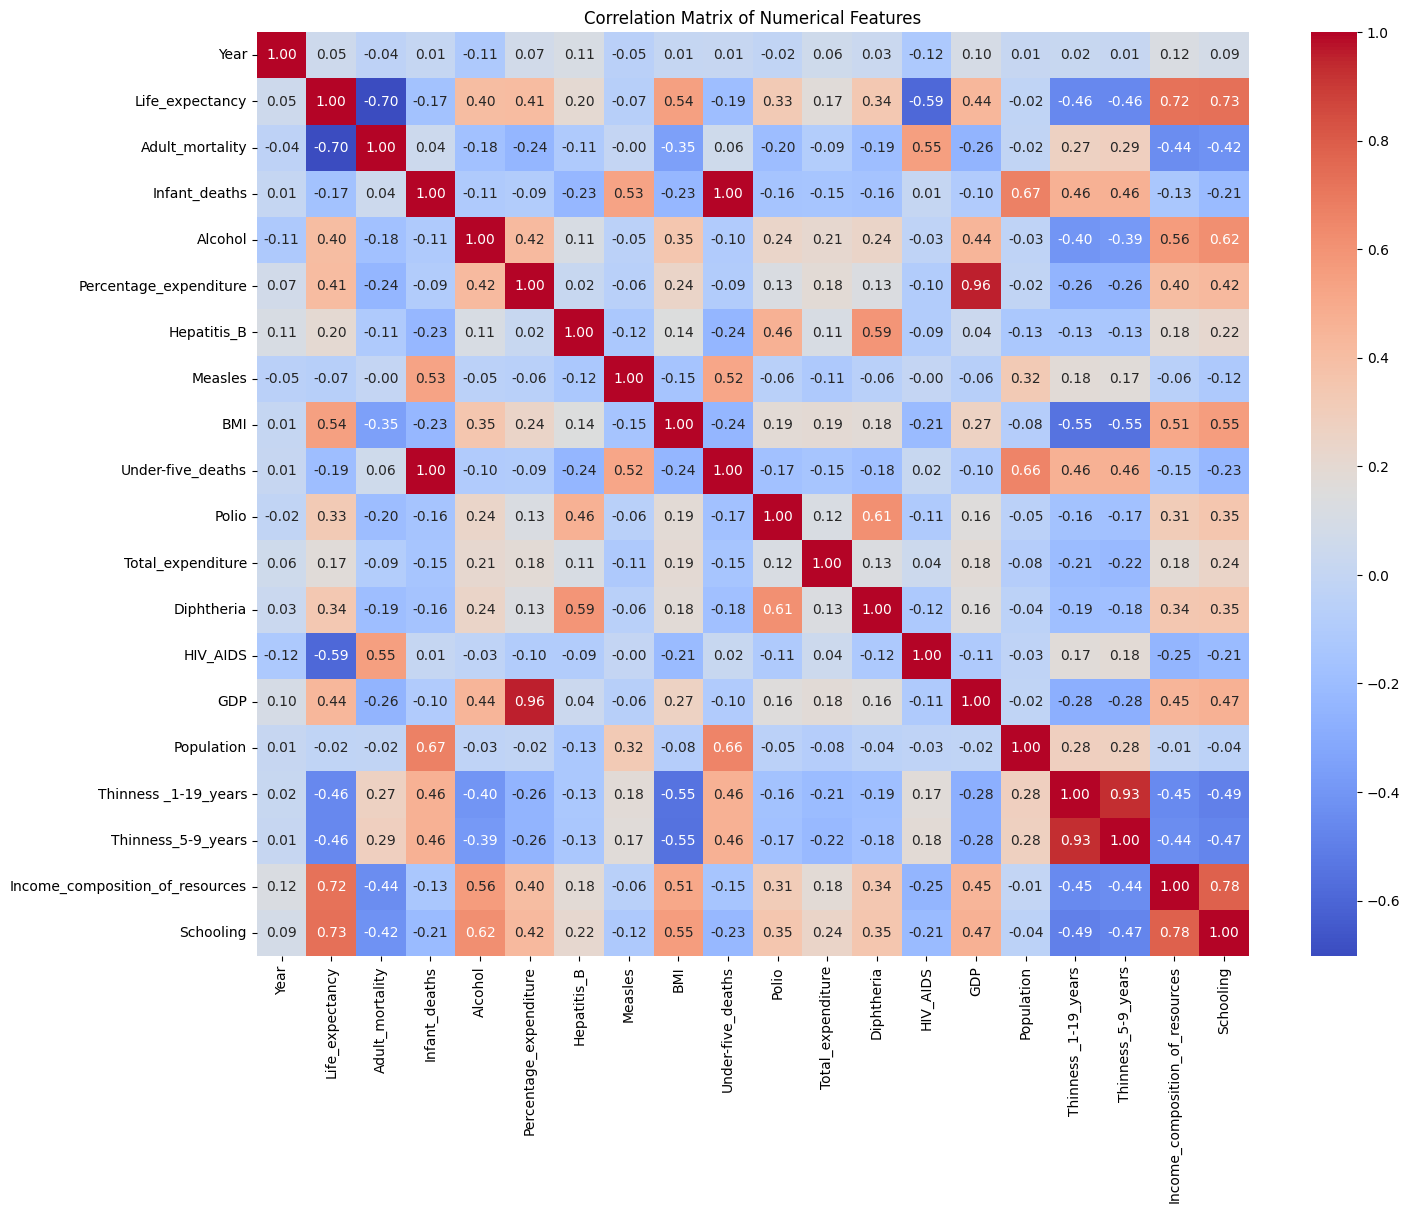

In [ ]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


The function scatter of matplotlib allows to plot two values against each other. Here is the documentation about this function:

```
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
```
Parameters:

**x, y** float or array-like, shape (n, )

The data positions.

**s** float or array-like, shape (n, ), optional

The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.

**c** array-like or list of colors or color, optional

The marker colors. Possible values:

- A scalar or sequence of n numbers to be mapped to colors using cmap and norm.

- A 2D array in which the rows are RGB or RGBA.

- A sequence of colors of length n.

- A single color format string.

**marker** MarkerStyle, default: rcParams (default: 'o')

The marker style. marker can be either an instance of the class or the text shorthand for a particular marker. See matplotlib.markers for more information about marker styles.

**cmapstr** or Colormap, default: rcParams(default: 'viridis')

A Colormap instance or registered colormap name. cmap is only used if c is an array of floats.

**norm** Normalize, default: None

If c is an array of floats, norm is used to scale the color data, c, in the range 0 to 1, in order to map into the colormap cmap. If None, use the default colors.Normalize.

**vmin, vmax** float, default: None

vmin and vmax are used in conjunction with the default norm to map the color array c to the colormap cmap. If None, the respective min and max of the color array is used. It is deprecated to use vmin/vmax when norm is given.

**alpha** float, default: None

The alpha blending value, between 0 (transparent) and 1 (opaque).

**linewidths** float or array-like, default: rcParams (default: 1.5)

The linewidth of the marker edges. Note: The default edgecolors is 'face'. You may want to change this as well.

**edgecolors** {'face', 'none', None} or color or sequence of color, default: rcParams["scatter.edgecolors"] (default: 'face')

The edge color of the marker. Possible values:

- 'face': The edge color will always be the same as the face color.

- 'none': No patch boundary will be drawn.
        
- A color or sequence of colors.

For non-filled markers, edgecolors is ignored. Instead, the color is determined like with 'face', i.e. from c, colors, or facecolors.

**plotnonfinite** bool, default: False

Whether to plot points with nonfinite c (i.e. inf, -inf or nan). If True the points are drawn with the bad colormap color (see Colormap.set_bad).


**TO CODE 2.4**

Plot life expectancy against one of your chosen values.

**QUESTION 6**

Which seems the most and the least promising values to use as a predictor for life expectancy?

The most promising features to predict life expectancy are Schooling, Income_composition_of_resources, BMI, and GDP due to their strong positive correlation. Also, Adult_mortality, HIV_AIDS, and Infant_deaths have strong negative correlation and are also informative. On the other hand, features like Measles, Hepatitis_B, and Population show very low correlation and are likely less useful for prediction.

## Checkpoint : 1
Call your teacher to validate the parts 1 and 2

## STEP 3: Simple Linear Regression

In [ ]:
import numpy as np

**TO CODE 3.1**

Select the Life Expectancy and the Income composition of resources of Belarus, Madagascar, India and Lithuania. This new Data Frame will be called df_study

In [ ]:
# Sélection des pays
selected_countries = ["Belarus", "Madagascar", "India", "Lithuania"]

# Filtrage du DataFrame
df_study = df[df["Country"].isin(selected_countries)][["Country", "Life_expectancy", "Income_composition_of_resources"]]

# Affichage du résultat
print(df_study)


         Country  Life_expectancy  Income_composition_of_resources
225      Belarus             72.0                            0.796
226      Belarus             71.7                            0.796
227      Belarus             71.9                            0.793
228      Belarus             72.0                            0.787
229      Belarus             73.0                            0.780
230      Belarus             70.0                            0.771
231      Belarus             70.0                            0.755
232      Belarus             69.8                            0.739
233      Belarus             68.9                            0.723
234      Belarus             68.1                            0.713
235      Belarus             68.2                            0.703
236      Belarus             67.7                            0.695
237      Belarus             67.2                            0.687
238      Belarus             67.7                            0

**TO CODE 3.2**

Implement a simple least square function and apply it on the previous selected data.

In [ ]:
def least_squares(x, y):
    """
    Calcule les coefficients theta_0 (intercept) et theta_1 (slope)
    d'une régression linéaire y = theta_0 + theta_1 * x
    """
    x_mean = x.mean()
    y_mean = y.mean()

    numerator = ((x - x_mean) * (y - y_mean)).sum()
    denominator = ((x - x_mean)**2).sum()

    theta_1 = numerator / denominator
    theta_0 = y_mean - theta_1 * x_mean

    return theta_0, theta_1


In [ ]:
# On récupère les colonnes
x = df_study["Income_composition_of_resources"]
y = df_study["Life_expectancy"]

# On calcule les coefficients
theta_0, theta_1 = least_squares(x, y)

print(f"Intercept (theta_0) = {theta_0:.2f}")
print(f"Slope (theta_1) = {theta_1:.2f}")


Intercept (theta_0) = 49.35
Slope (theta_1) = 28.60


**TO CODE 3.3**

On the same figure, draw the line corresponding to your regression and the data points corresponding to df_study

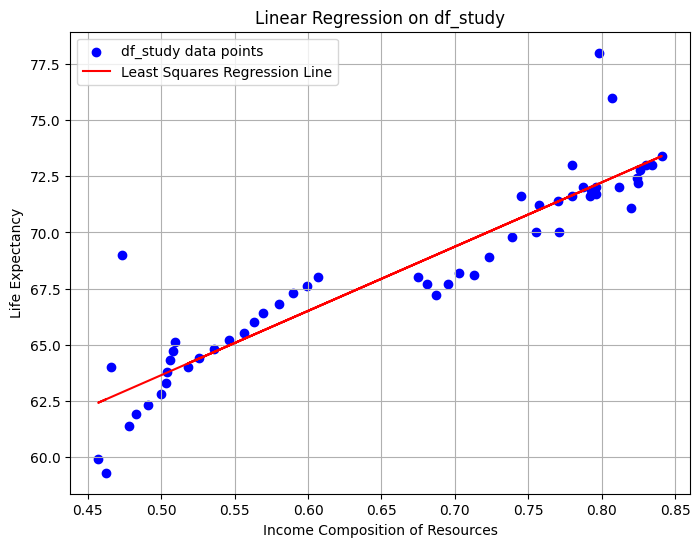

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les colonnes utiles
x = df_study["Income_composition_of_resources"]
y = df_study["Life_expectancy"]

# Calcul des paramètres du modèle
theta_0, theta_1 = least_squares(x, y)

# Prédictions (droite de régression)
y_pred = theta_0 + theta_1 * x

# Tracé
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='df_study data points')
plt.plot(x, y_pred, color='red', label='Least Squares Regression Line')
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy")
plt.title("Linear Regression on df_study")
plt.legend()
plt.grid(True)
plt.show()


## Checkpoint : 2
Call your teacher to validate the least square section

**TO CODE 3.4**

Now, implement a Gradient Descend function `def gradDescent(x, y, w, alpha, iters)` where `x` are
the covariates, `y` the target value, `w` the initial weights, `alpha` the learning rate and `iters` the number of gradient descent iterations. Your function should return all intermediary values of `w` that has been computed as a list.

As a gentle reminder, Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. It is an iterative algorithm that aim to find the `w`  that minimizes our objective function. Since we aim to minimize the squared error, we aim to minimize the function : $L(y, \hat{y})=\sum\limits_{i=1}^n (y_i - w_1x_i-w_0)^2 $

Since previous function is convex, the derivative at each point indicate the **opposite** direction of the minimum. Thus, the idea is to update each weight by a small proportion of the opposite of this direction :
$w_i^{t+1} = w_i^t - \alpha \frac{d(L(y, \hat{y}))}{d(w_i)}$

Be careful : here we have to update two weights, so we have to compute both derivative. Pay also attention on the fact that the derivative is computed according to $w_i$. Once you noticed that, calculating the derivative is pretty straightforward

In [ ]:
def gradDescent(x, y, theta, alpha, iters):
    """
    Descente de gradient pour régression linéaire y = theta_0 + theta_1 * x
    x : covariates (vecteur)
    y : target values
    theta : [theta_0, theta_1]
    alpha : learning rate
    iters : number of iterations
    """
    m = len(y)  # nombre d'exemples
    history = []  # pour stocker les (theta_0, theta_1) à chaque itération

    for i in range(iters):
        y_pred = theta[0] + theta[1] * x
        error = y_pred - y

        # dérivées partielles
        d_theta0 = (1/m) * error.sum()
        d_theta1 = (1/m) * (error * x).sum()

        # mise à jour des paramètres
        theta[0] -= alpha * d_theta0
        theta[1] -= alpha * d_theta1

        # stocker la paire (theta_0, theta_1)
        history.append((theta[0], theta[1]))

    return history


**TO CODE 3.5**

Compute the gradient descend on df_study for 1000 iterations with different values of `alpha`. You
may initialize `theta` with `theta_0 = 0` and `theta_1 = 1`

In [ ]:
# Initialisation
theta = [0, 1]  # theta_0 = 0, theta_1 = 1
alpha = 0.01    # tu peux tester d'autres valeurs
iters = 1000

# Variables x et y
x = df_study["Income_composition_of_resources"]
y = df_study["Life_expectancy"]

# Exécution de la descente de gradient
theta_history = gradDescent(x, y, theta.copy(), alpha, iters)

# Derniers paramètres obtenus
theta_final = theta_history[-1]
print(f"Final theta_0 = {theta_final[0]:.4f}, theta_1 = {theta_final[1]:.4f}")


Final theta_0 = 47.1325, theta_1 = 31.9093


**TO CODE 3.6**

On the same figure, plot the evolution of theta_0 through the iterations for each different values of
alpha you chose. Do the same thing for theta_1.

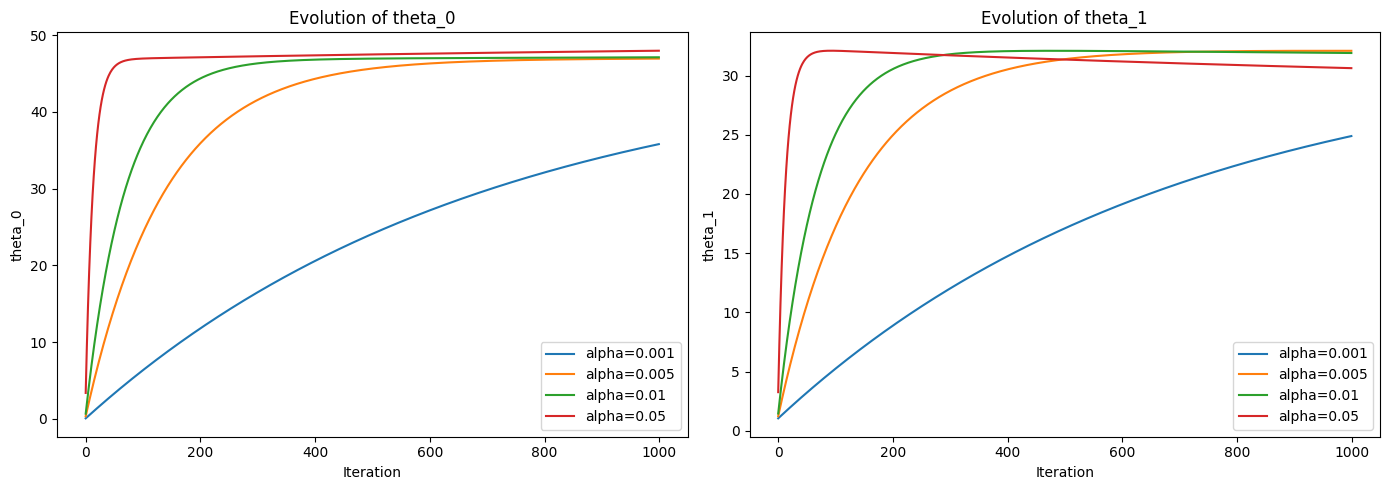

In [ ]:
import matplotlib.pyplot as plt

# Différentes valeurs d'alpha à tester
alphas = [0.001, 0.005, 0.01, 0.05]
iters = 1000
theta_init = [0, 1]

plt.figure(figsize=(14, 5))

# Plot theta_0
plt.subplot(1, 2, 1)
for alpha in alphas:
    history = gradDescent(x, y, theta_init.copy(), alpha, iters)
    theta_0_vals = [t[0] for t in history]
    plt.plot(theta_0_vals, label=f"alpha={alpha}")
plt.title("Evolution of theta_0")
plt.xlabel("Iteration")
plt.ylabel("theta_0")
plt.legend()

# Plot theta_1
plt.subplot(1, 2, 2)
for alpha in alphas:
    history = gradDescent(x, y, theta_init.copy(), alpha, iters)
    theta_1_vals = [t[1] for t in history]
    plt.plot(theta_1_vals, label=f"alpha={alpha}")
plt.title("Evolution of theta_1")
plt.xlabel("Iteration")
plt.ylabel("theta_1")
plt.legend()

plt.tight_layout()
plt.show()


**Question 7**

Discuss on the role of alpha

$R^2$ is the coefficient of determination useful to score a regression against the ground truth data.

This coefficient can be computed with a sklearn function:

```
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
```

With:

**y_true** array-like of shape (n_samples,) or (n_samples, n_outputs)

Ground truth (correct) target values.

**y_pred** array-like of shape (n_samples,) or (n_samples, n_outputs)

Estimated target values.

**sample_weight** array-like of shape (n_samples,), default=None

Sample weights.

**multioutput** {‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) or None, default=’uniform_average’

Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average”.

- ‘raw_values’: Returns a full set of scores in case of multioutput input.

- ‘uniform_average’: Scores of all outputs are averaged with uniform weight.

- ‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.


In [ ]:
from sklearn.metrics import r2_score



R² score = 0.8352


**TO CODE 3.7**

Compute $R^2$ on the regression with df_study

In [ ]:
# Prédictions avec les valeurs finales de theta
theta_final = gradDescent(x, y, [0, 1], 0.01, 1000)[-1]
y_pred = theta_final[0] + theta_final[1] * x

# Calcul du R²
r2 = r2_score(y, y_pred)
print(f"R² score = {r2:.4f}")


**QUESTION 8**

Is linear regression suited between the two selected variables?

Yes, linear regression is well suited for modeling the relationship between Income_composition_of_resources and Life_expectancy.
The relationship is approximately linear, and the R² score is high, indicating a strong and reliable fit. The model captures the trend effectively with simple assumptions.



**QUESTION 9**

If not, what would be the relevant regression between these two variables?

If the relationship between Income_composition_of_resources and Life_expectancy were not linear, a more appropriate regression model could be:

Polynomial regression (e.g., quadratic or cubic), if the data showed a curved trend.

Logarithmic or exponential models, if the relationship followed growth/decay patterns.

Non-parametric models such as Decision Tree Regression or Random Forest Regression, which can capture complex patterns without assuming a fixed functional form.

Or even Support Vector Regression (SVR) or Neural Networks for high flexibility on nonlinear data.

## Checkpoint : 3
Call your teacher to validate the rest of section 3

## STEP 4: Diagnostic visualization

**TO CODE 4.1**

Compute the residuals and plot the residuals vs fitted values.

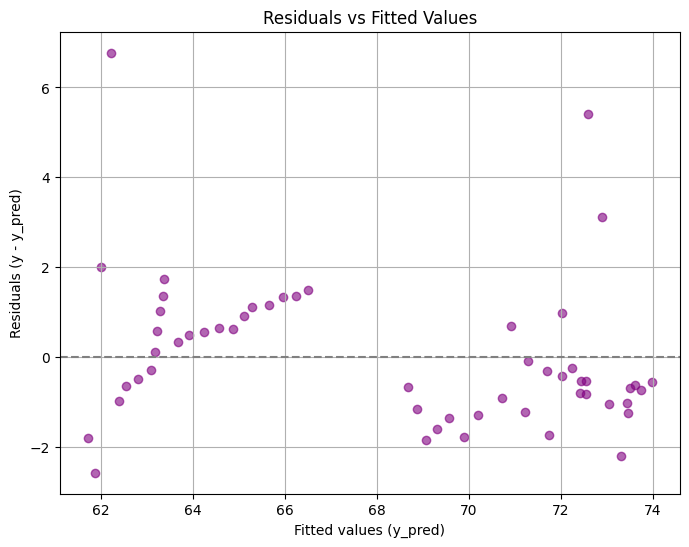

In [ ]:
import matplotlib.pyplot as plt

# Recalculer les prédictions
theta_final = gradDescent(x, y, [0, 1], 0.01, 1000)[-1]
y_pred = theta_final[0] + theta_final[1] * x

# Calcul des résidus
residuals = y - y_pred

# Tracé
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Fitted values (y_pred)")
plt.ylabel("Residuals (y - y_pred)")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()


**Question 10**

What can you conclude about this plot ?


The residuals are not perfectly centered around 0 and show a pattern: positive residuals for lower fitted values and negative for higher ones.
This suggests a potential slight curvature in the data, indicating that a linear model may not perfectly capture the relationship. However, the overall spread is moderate and still acceptable for a linear fit.

**TO CODE 4.2**

Also compute the Scale Location plot


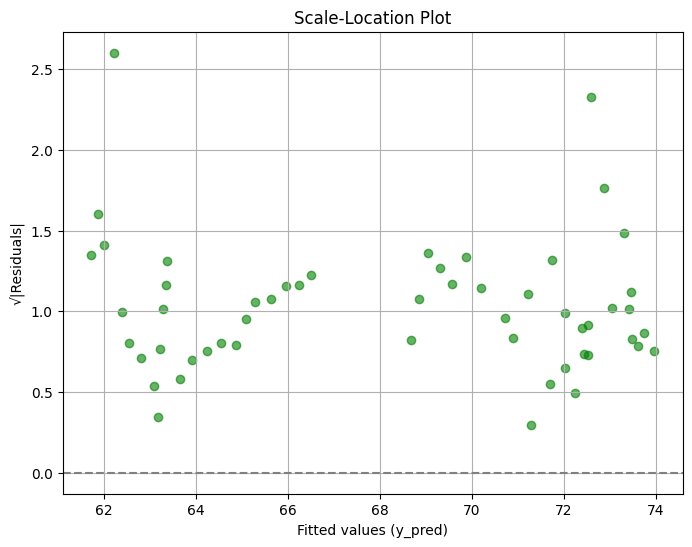

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcul de la racine des résidus absolus
residuals = y - y_pred
sqrt_abs_resid = np.sqrt(np.abs(residuals))

# Tracé
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, sqrt_abs_resid, color='green', alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Fitted values (y_pred)")
plt.ylabel("√|Residuals|")
plt.title("Scale-Location Plot")
plt.grid(True)
plt.show()


**Question 11**

What can you conclude about this plot ?


The Scale-Location plot shows a moderately even spread of residuals across fitted values, but there is some variation in the spread — especially at lower fitted values.
This suggests a mild heteroscedasticity, meaning the error variance is not perfectly constant. However, the deviations are not extreme, so the linear model remains acceptable.

::**TO CODE 4.3**

Compute now the Cook's distance for our data. You can compute it by yourself or use any library you can find.


[9.40833944e-05 1.27605909e-03 1.16628927e-04 1.48203237e-04
 1.19738027e-02 1.20095128e-02 4.79917081e-03 2.25122899e-03
 5.51506905e-03 1.10607014e-02 6.15012611e-03 8.80442556e-03
 1.18919233e-02 4.58329701e-03 1.52389682e-03 6.95580443e-03
 5.48316912e-03 5.37113341e-03 3.69592790e-03 3.25188019e-03
 1.70142757e-03 3.74111262e-04 3.60956272e-04 1.05911474e-04
 7.05707547e-07 2.08916693e-04 1.71075819e-08 4.03789047e-04
 7.02481887e-05 2.76745940e-04 2.48222676e-03 5.23218430e-03
 2.63762561e-02 2.77864895e-03 1.05084748e-01 2.60012340e-01
 1.15044958e-03 1.94593841e-05 6.14825927e-06 2.28708041e-04
 4.52906776e-03 1.23233522e-02 5.90528910e-03 2.04854013e-03
 1.35518047e-05 1.69279050e-03 6.64700056e-03 1.18324732e-02
 1.68967238e-02 2.89575821e-02 4.32096135e-01 2.13886948e-02
 8.27570159e-02 1.33496664e-01]


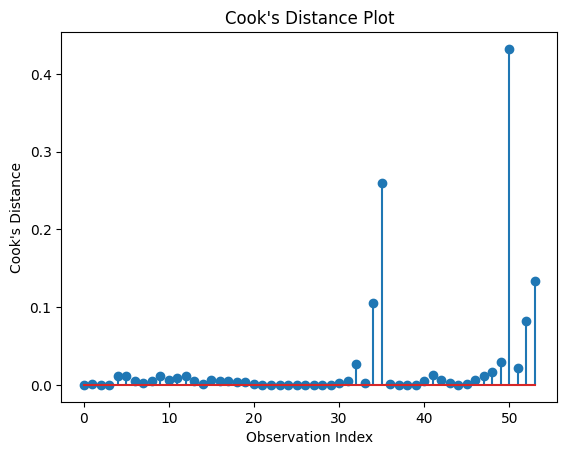

In [ ]:
import statsmodels.api as sm

# Fit the linear regression model
X = sm.add_constant(x)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

# Get influence measures
influence = model.get_influence()

# Cook's distance
cooks_distance = influence.cooks_distance[0]

# Print or plot Cook's distance
print(cooks_distance)

# Example plot (optional)
plt.stem(cooks_distance)
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()


**Question 12**

What can you conclude about this plot ?


The Cook's Distance plot shows that most data points have a very low influence on the linear regression model.
A few points (especially around index 50) have moderately high Cook’s distances (up to ~0.4), but none exceed the critical threshold of 1.0, which is typically used to flag highly influential observations.

Therefore, no single point appears to unduly influence the regression model, and the model’s parameters are considered stable. However, it may still be useful to review the data points with the highest values for potential anomalies or outliers.



**TO DO 4.1**

We are now adding multiple variable in our regression problem. Run the following cell in order to add multiple variables to your model :

In [ ]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
y = df_study.Life_expectancy
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]].to_numpy(dtype='float64')

**TO CODE 4.4**

Dealing with too many variables can sometimes be counter-productive and it can be more interesting to remove some features. One way to evaluate the importance of each variable is to compute the f_test whose function is named f_regression in sklearn.

In [ ]:
from sklearn.feature_selection import f_regression

# Liste des features à tester (déjà dans X)
feature_names = ['Adult_mortality', 'Alcohol', 'Total_expenditure',
                 'Income_composition_of_resources', 'Schooling', 'HIV_AIDS']

# Calcul du f-test
f_values, p_values = f_regression(X, y)

# Affichage formaté
for name, f, p in sorted(zip(feature_names, f_values, p_values), key=lambda x: x[1], reverse=True):
    print(f"{name:<35} F-value: {f:.2f}   P-value: {p:.4f}")


Income_composition_of_resources     F-value: 287.05   P-value: 0.0000
Schooling                           F-value: 261.51   P-value: 0.0000
Alcohol                             F-value: 125.09   P-value: 0.0000
HIV_AIDS                            F-value: 106.62   P-value: 0.0000
Total_expenditure                   F-value: 36.73   P-value: 0.0000
Adult_mortality                     F-value: 3.86   P-value: 0.0547


**QUESTION 13**

According to the f_test, rank each variable from the least to the most promising. Compare it with the correlation of your subset.

## Checkpoint : 4
Call your teacher to validate the section 4. Congrats, you finished the first TP !